In [162]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
%matplotlib inline 

In [163]:
bankDF=pd.read_csv('Data/Qualitative_Bankruptcy.data',sep=',',names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])
bankDF.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


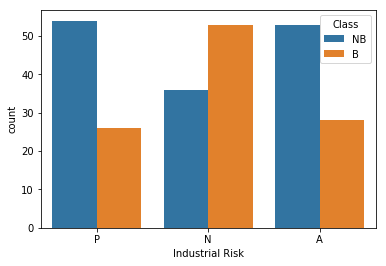

In [164]:
sns.countplot(x='Industrial Risk',hue='Class', data=bankDF)
plt.show()

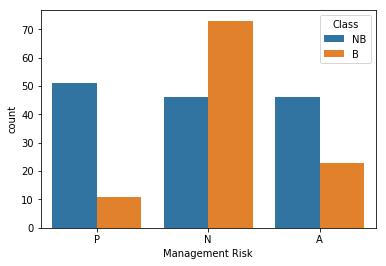

In [165]:
sns.countplot(x='Management Risk',hue='Class', data=bankDF)
plt.show()

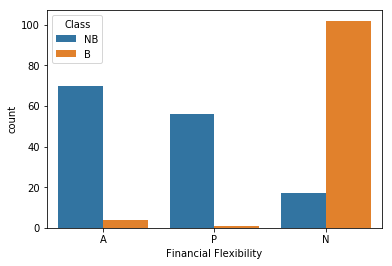

In [166]:
sns.countplot(x='Financial Flexibility',hue='Class', data=bankDF)
plt.show()

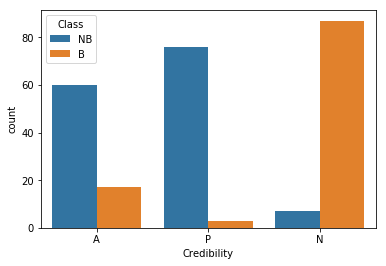

In [167]:
sns.countplot(x='Credibility',hue='Class', data=bankDF)
plt.show()

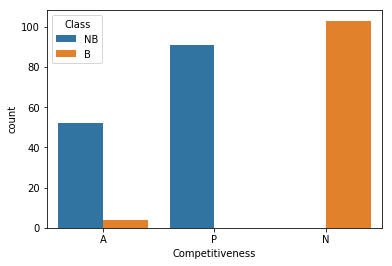

In [168]:
sns.countplot(x='Competitiveness',hue='Class', data=bankDF)
plt.show()

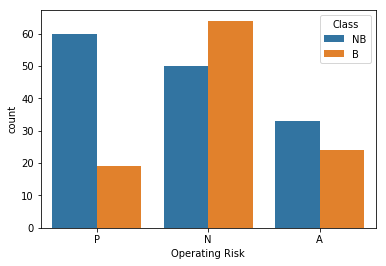

In [169]:
sns.countplot(x='Operating Risk',hue='Class', data=bankDF)
plt.show()

In [170]:
from sklearn import preprocessing 

In [171]:
label_encoder = preprocessing.LabelEncoder() 

In [172]:
bankDF_encoded=bankDF.drop("Class",axis=1)
bankDF_encoded.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [173]:
for col in bankDF_encoded.columns:
    bankDF_encoded[col]= label_encoder.fit_transform(bankDF_encoded[col]) 

In [174]:
bankDF_encoded.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [175]:
from sklearn.preprocessing import OneHotEncoder 

In [176]:
onehotencoder = OneHotEncoder() 

In [177]:
bankDF_encoded =pd.DataFrame(onehotencoder.fit_transform(bankDF_encoded).toarray()) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [178]:
bankDF_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [179]:
Y=bankDF['Class'] # Target Data
X=bankDF_encoded

In [180]:
from sklearn.model_selection import train_test_split
test_size = 0.20 # taking 80:20 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=test_size, random_state=seed)


In [181]:
print('X_train',X_train.shape,'X_test',X_test.shape)

X_train (200, 18) X_test (50, 18)


In [182]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [183]:
X_std = StandardScaler().fit_transform(X_train)

In [184]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00502513e+00 -5.47050073e-01 -4.71826432e-01  2.46917670e-01
  -2.84805650e-01  7.60713041e-02  2.30634221e-02  3.32528991e-02
  -6.33642464e-02  1.39425166e-02 -1.28282955e-01  1.19815923e-01
   6.94348141e-02 -1.20895091e-01  6.31641834e-02  2.08904000e-01
  -1.70903675e-01 -9.59206447e-03]
 [-5.47050073e-01  1.00502513e+00 -4.87589823e-01 -3.16928754e-01
   4.20624835e-01 -1.61628241e-01 -6.64461773e-02  1.50186828e-01
  -1.04914868e-01  1.53925016e-02  8.64987905e-02 -1.05475350e-01
  -9.67892455e-02  3.21259143e-01 -2.45828940e-01 -5.58892287e-02
   2.04414732e-01 -1.65403174e-01]
 [-4.71826432e-01 -4.87589823e-01  1.00502513e+00  7.61967452e-02
  -1.45846739e-01  9.08240949e-02  4.58960160e-02 -1.92738616e-01
   1.76475752e-01 -3.07344662e-02  4.26763223e-02 -1.38770343e-02
   2.94966415e-02 -2.12117603e-01  1.92902178e-01 -1.58931379e-01
  -3.70072439e-02  1.84090822e-01]
 [ 2.46917670e-01 -3.16928754e-01  7.61967452e-02  1.00502513e+00
  -5.93150125e-01

<Figure size 3600x1800 with 0 Axes>

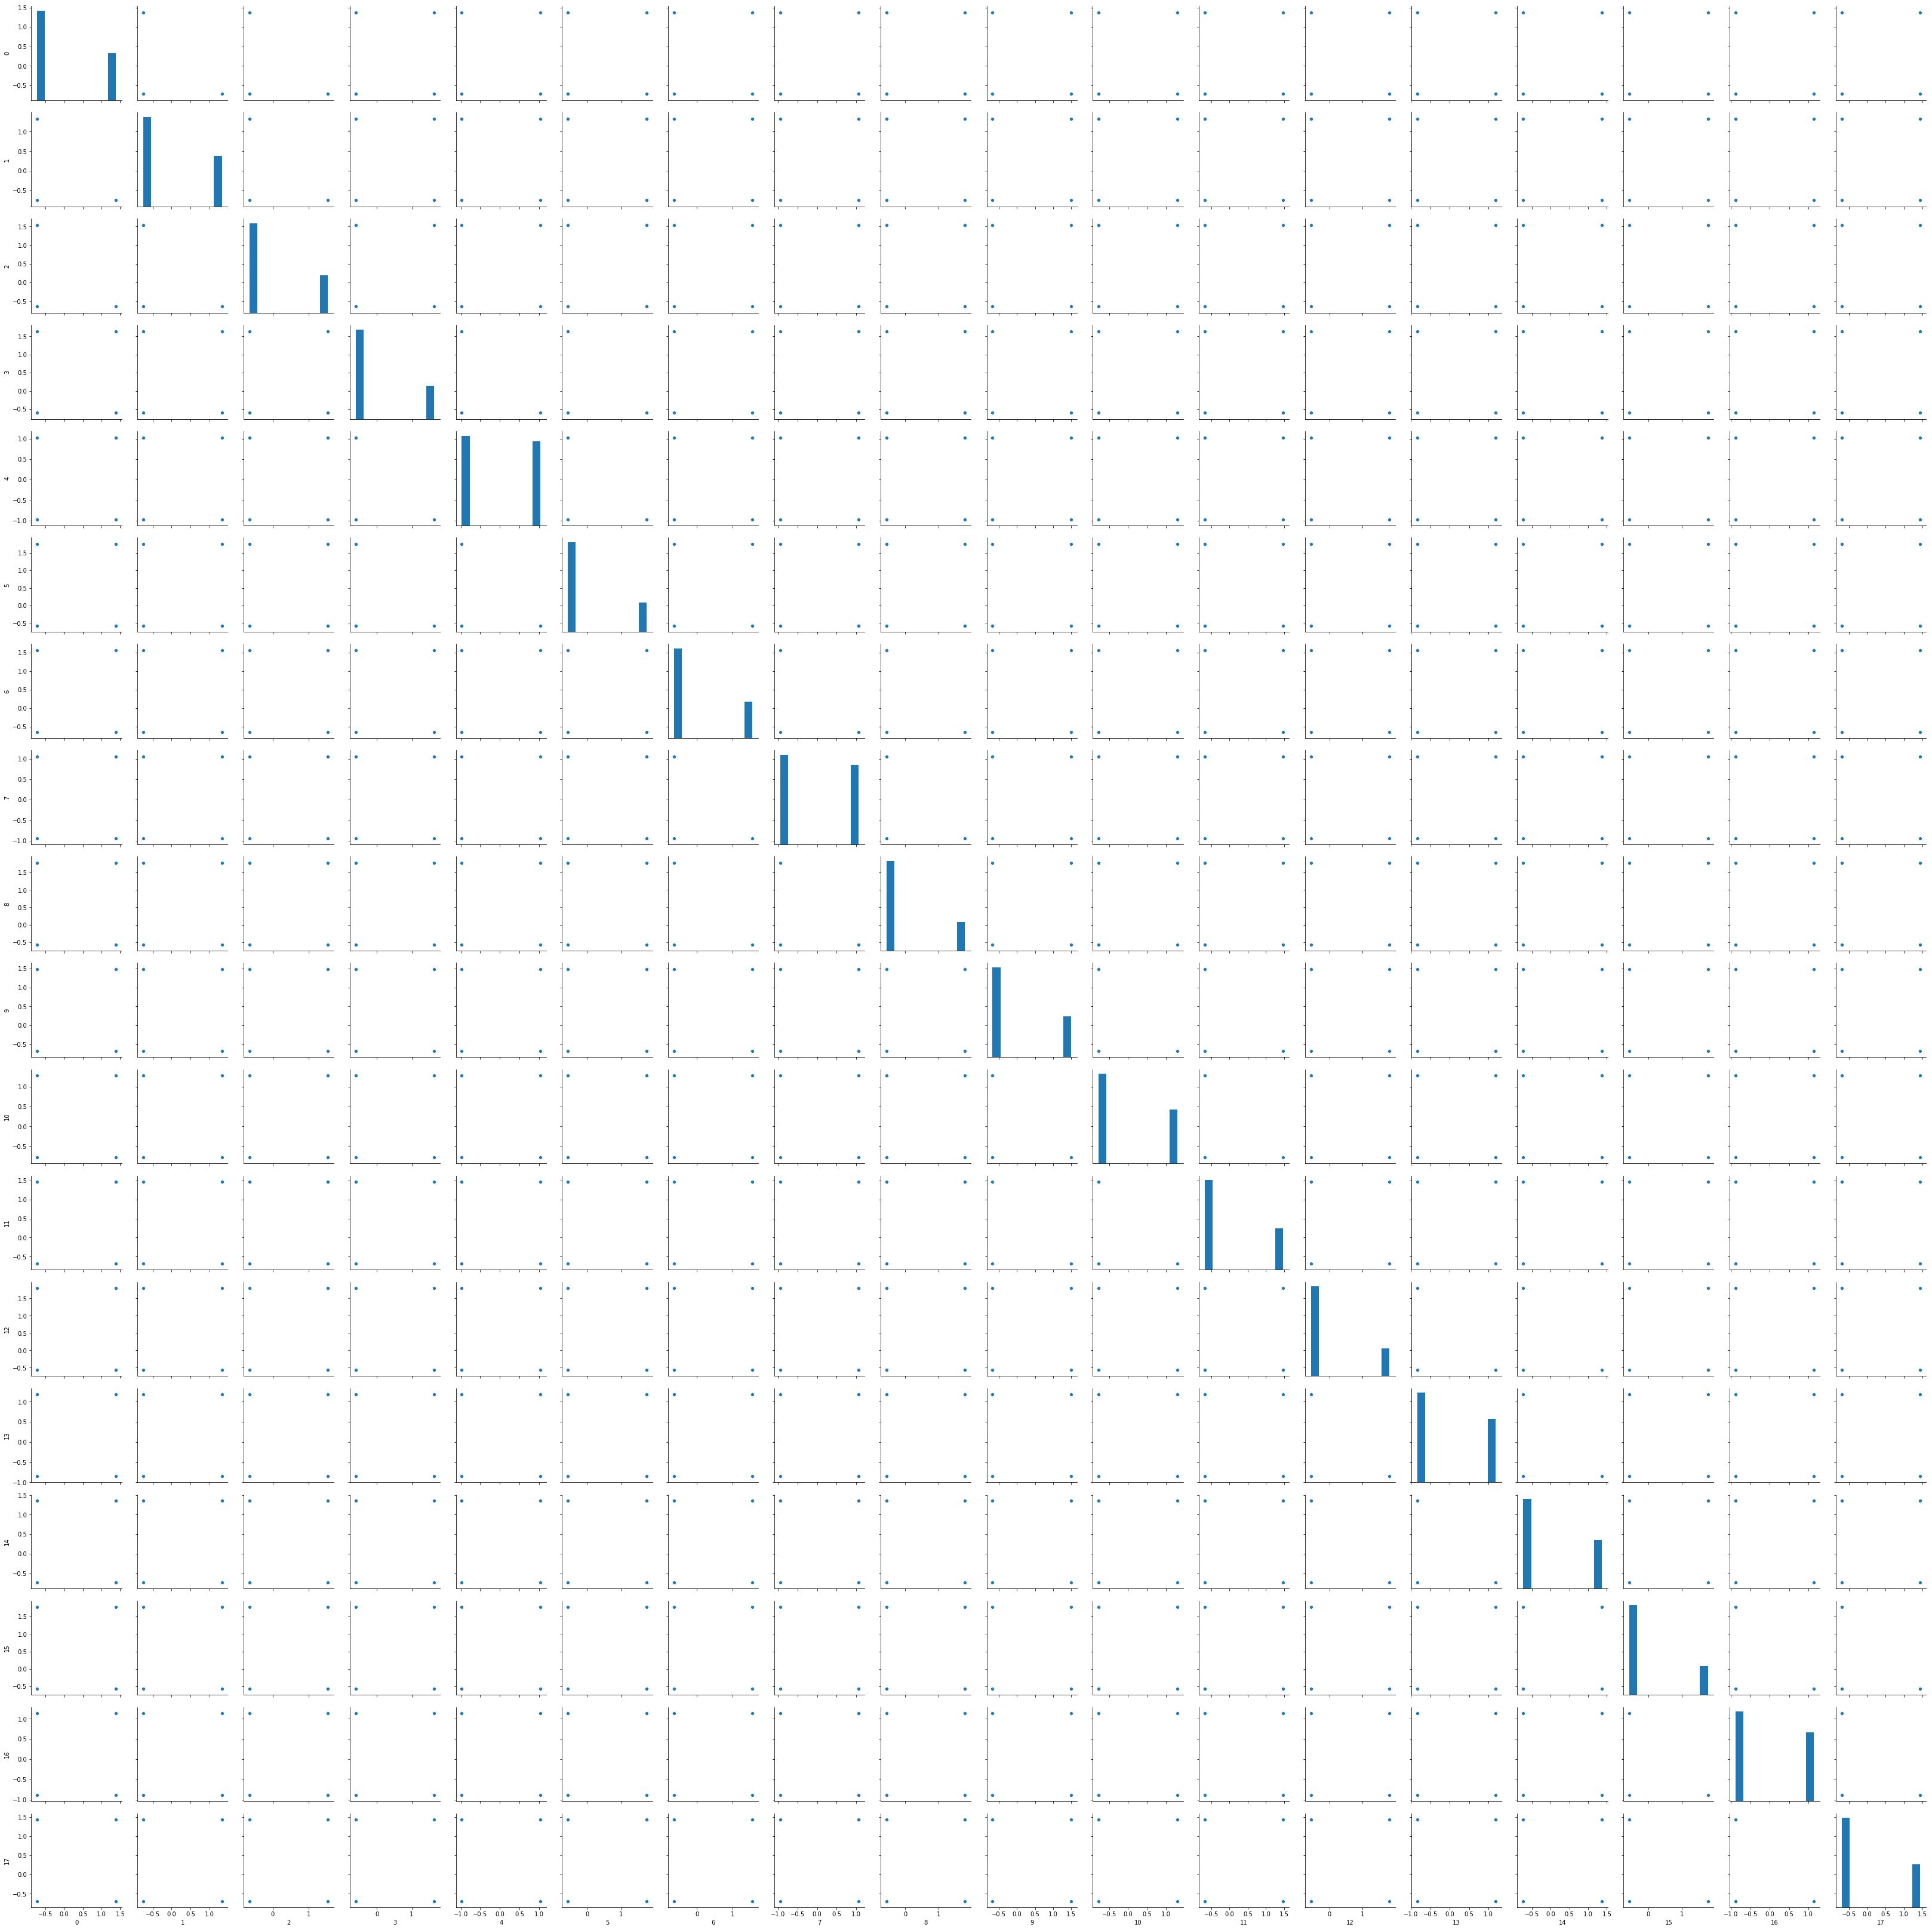

In [185]:
plt.figure(figsize=(50,25))
X_std_df = pd.DataFrame(X_std)
sns.pairplot(data=X_std_df)

In [186]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [187]:
# Step 2- Get eigen values and eigen vector

In [188]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.09495896  0.37708828  0.35102647 -0.19697842 -0.05990036  0.13334692
   0.13449415  0.27649357 -0.18965253 -0.39121285  0.19855996  0.04768834
   0.5423391   0.0465852   0.06900611  0.0351541   0.13616681 -0.02651995]
 [-0.20346532 -0.35409439 -0.17916276 -0.28668693  0.1517611   0.07022177
  -0.14233808  0.09563121 -0.08282027  0.28038916 -0.46607723 -0.10978134
   0.54762335  0.0470391   0.06967846  0.03549663  0.13749355 -0.02677834]
 [ 0.11517094 -0.020372   -0.17732706  0.50707311 -0.09729482 -0.21290842
   0.00962196 -0.38886541  0.28486041  0.1126723   0.28358736  0.06583926
   0.52029097  0.04469133  0.06620075  0.03372496  0.13063112 -0.02544181]
 [ 0.10079008  0.48089923 -0.07679399  0.03875432  0.03708563 -0.17813581
   0.25147879 -0.058338    0.18209165  0.02373285 -0.54595334  0.08774205
  -0.18738405 -0.00765982  0.02586178  0.21661109  0.37427293 -0.05193238]
 [-0.25612021 -0.25211428 -0.14561351 -0.26996291 -0.03640631  0.02060756
  -0.27176673 -0

In [189]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [190]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.08589156  37.13979327  47.5186413   57.38916297  65.92465381
  73.64883091  80.66157592  86.65497906  91.71707009  96.25340489
  98.74901124 100.         100.         100.         100.
 100.         100.         100.        ]


In [191]:
# First 10 principal components explain 96% of the variance in the data. 

In [192]:
pca = PCA(n_components=10)
pca.fit(X_std)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [193]:
X_pca = pca.transform(X_std)

In [194]:
X_pca.shape

(200, 10)

In [195]:
X_pcaDF=pd.DataFrame(X_pca)

In [196]:
X_pcaDF.head()

,0,1,2,3,4,5,6,7,8,9
0,2.023159,2.293856,0.586079,0.840502,-1.531146,-1.289084,0.004604,0.586649,0.711592,-0.591874
1,0.604000,0.963092,0.970576,0.381989,1.156329,0.252585,0.338242,-1.192917,-0.598186,-2.217526
2,-0.681269,-0.899468,-3.034599,-0.798457,1.755978,-1.355253,0.654285,0.437490,0.316873,-0.604197
3,2.042967,-0.399500,0.028986,-2.284221,0.190793,1.591777,0.924279,-0.855697,-0.199222,1.136880
4,1.800092,0.737617,1.336794,1.389595,-1.095398,-2.053324,1.173211,0.137776,-1.061010,0.436038


In [197]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [198]:
cluster_errors = []

In [199]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 11 )
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=0)
  clusters.fit(X_pcaDF)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [200]:
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3465.122576
1,2,2663.490400
2,3,2365.456633
3,4,2168.529417
4,5,2004.819813
5,6,1834.290388
6,7,1750.072826
7,8,1671.619285
8,9,1605.635949
9,10,1530.330127


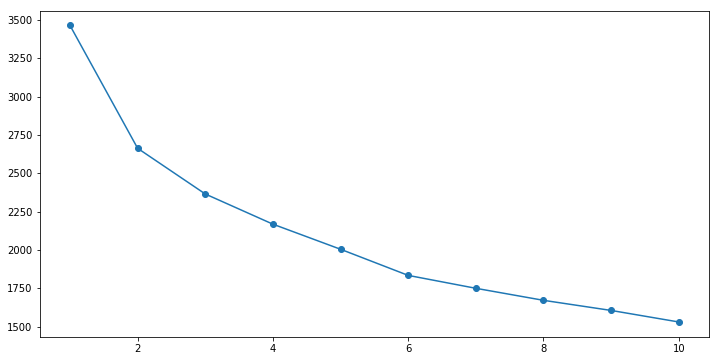

In [201]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Visually we can see that the error rate slows down after the 2 cluster, so we choose k as 2

In [202]:
kmeans = KMeans(n_clusters=2, n_init = 10, random_state=1)
a=kmeans.fit_transform(X_pcaDF)


In [203]:
centroids=kmeans.cluster_centers_

In [204]:
centroid_df = pd.DataFrame(centroids, columns = list(X_pcaDF) )


In [205]:
centroid_df

,0,1,2,3,4,5,6,7,8,9
0,-1.715460,-0.093923,-0.192192,-0.159483,0.031221,-0.034371,-0.047645,0.057524,0.006637,-0.043880
1,2.273981,0.124503,0.254766,0.211408,-0.041386,0.045561,0.063158,-0.076253,-0.008798,0.058167


In [206]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [207]:
X_pcaDF = X_pcaDF.join(df_labels)
X_pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,2.023159,2.293856,0.586079,0.840502,-1.531146,-1.289084,0.004604,0.586649,0.711592,-0.591874,1
1,0.604000,0.963092,0.970576,0.381989,1.156329,0.252585,0.338242,-1.192917,-0.598186,-2.217526,1
2,-0.681269,-0.899468,-3.034599,-0.798457,1.755978,-1.355253,0.654285,0.437490,0.316873,-0.604197,0
3,2.042967,-0.399500,0.028986,-2.284221,0.190793,1.591777,0.924279,-0.855697,-0.199222,1.136880,1
4,1.800092,0.737617,1.336794,1.389595,-1.095398,-2.053324,1.173211,0.137776,-1.061010,0.436038,1


In [208]:
X_test_std = StandardScaler().fit_transform(X_test)

In [209]:
X_test_pca = pca.transform(X_test_std)

In [210]:
X_test_pcaDF=pd.DataFrame(X_test_pca)

In [211]:
b=kmeans.fit_transform(X_test_pcaDF)

In [212]:
centroids_test=kmeans.cluster_centers_

In [214]:
centroid_test_df = pd.DataFrame(centroids_test, columns = list(X_test_pcaDF) )


In [215]:
centroid_test_df

,0,1,2,3,4,5,6,7,8,9
0,-1.763815,-0.269935,-0.147301,-0.299363,0.044901,0.046119,0.060055,-0.253013,0.033932,0.104400
1,2.435745,0.372768,0.203415,0.413406,-0.062006,-0.063689,-0.082933,0.349399,-0.046859,-0.144172


In [216]:
df_test_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_test_labels['labels'] = df_test_labels['labels'].astype('category')

In [217]:
X_test_pcaDF = X_test_pcaDF.join(df_test_labels)
X_test_pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-0.490124,1.074281,-1.436156,0.809826,-1.847242,0.744706,0.145480,-0.614001,-0.013230,-0.037344,0
1,1.060294,0.314288,1.012878,-0.507141,0.985220,2.274168,-1.328462,2.040288,-1.738920,0.918311,1
2,1.779065,0.861980,1.609631,1.098641,-1.013837,-2.030457,1.349081,0.237546,-1.044710,0.248381,1
3,2.736355,0.817898,0.749802,-0.069200,-0.338196,-1.042495,0.365753,0.514197,-1.084673,-1.660680,1
4,-2.750008,0.709770,0.000142,1.125393,0.830197,0.375545,-2.020263,-1.311590,1.343251,-0.433317,0


In [230]:
from sklearn.svm import SVC

In [231]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1) #liner algo
svc_model.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [232]:
prediction = svc_model.predict(X_test)

In [233]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.985
0.98


In [234]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[20  0]
 [ 1 29]]


In [235]:
# Building a Support Vector Machine on train data 
svc_model = SVC(kernel='rbf') #radial basis function algo
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [236]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.985
0.98


In [237]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[20  0]
 [ 1 29]]


In [238]:
# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')# Polynomial algo
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [239]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.92
0.96


In [240]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[19  0]
 [ 2 29]]


### SVC with linear and poly kernel have same accuracy with 98